Импортируем необходимые библиотеки

In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd

Загрузим датасет и посмотрим на признаки

In [2]:
newsgroups = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [6]:
newsgroups

{'data': ['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
  "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and 

In [14]:
newsgroups.__class__

sklearn.utils._bunch.Bunch

In [18]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
# Предобработка текста
stop_words = ['the', 'a', 'an', 'and', 'or', 'but', 'is', 'are', 'was', 'were']
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [9]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [40]:
# Получение компонент
components = pca.components_

# Создание DataFrame с компонентами PCA
components_df = pd.DataFrame(components, columns=vectorizer.get_feature_names_out())

# Вывод вклада каждой переменной для первой и второй главных компонент
components_df

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zznkzz,zznp,zzrk,zzy_3w,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,-0.024127,0.004649,-0.000163,-0.000537,6.875552e-06,-0.000183,-0.000247,-0.000007,-0.000007,-0.000007,...,-0.000007,-0.000014,-0.000014,-0.000014,-0.000075,-0.000005,0.000005,0.000023,-0.000144,-0.000144
1,0.003039,0.017469,-0.000270,-0.000024,-8.979914e-07,-0.000107,0.000624,0.000004,0.000004,0.000004,...,0.000005,0.000008,0.000008,0.000009,0.000574,0.000003,0.000264,0.000229,-0.000058,-0.000058


In [11]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train.toarray())
X_test_tsne = tsne.fit_transform(X_test.toarray())

In [13]:
# Модель машинного обучения: логистическая регрессия
model = LogisticRegression(random_state=42)

In [19]:
# Классификация для каждого метода понижения размерности
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

In [20]:
model.fit(X_train_tsne, y_train)
y_pred_tsne = model.predict(X_test_tsne)
accuracy_tsne = accuracy_score(y_test, y_pred_tsne)
f1_tsne = f1_score(y_test, y_pred_tsne, average='macro')

In [21]:
print(f"PCA Accuracy: {accuracy_pca:.3f}, F1 Score: {f1_pca:.3f}")
print(f"t-SNE Accuracy: {accuracy_tsne:.3f}, F1 Score: {f1_tsne:.3f}")

PCA Accuracy: 0.153, F1 Score: 0.093
t-SNE Accuracy: 0.057, F1 Score: 0.029


Визуализация данных

Вклад переменных в первую компоненту: [-2.41273220e-02  4.64863141e-03 -1.63374250e-04 ...  2.31002349e-05
 -1.43881226e-04 -1.43881226e-04]
Вклад переменных во вторую компоненту: [ 3.03883232e-03  1.74689754e-02 -2.69584021e-04 ...  2.29378666e-04
 -5.78885035e-05 -5.78885035e-05]


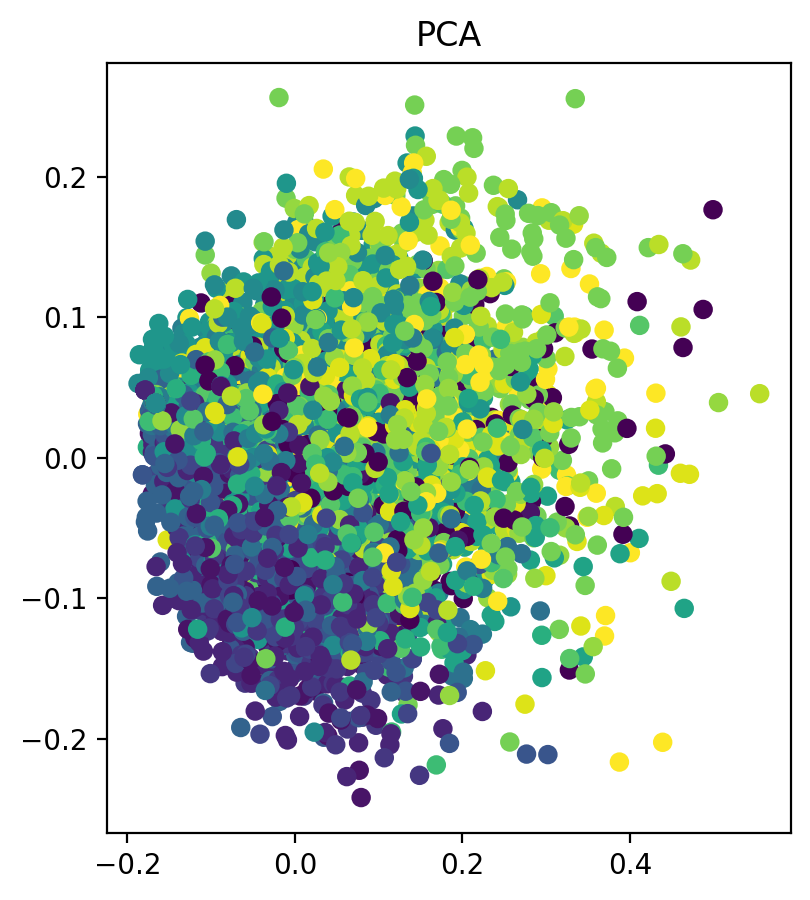

In [30]:
plt.figure(figsize=(15, 5), dpi=200)

plt.subplot(1, 3, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("PCA")

# вывод влияния признаков на компоненты
print("Вклад переменных в первую компоненту:", pca.components_[0])
print("Вклад переменных во вторую компоненту:", pca.components_[1])

Text(0.5, 1.0, 't-SNE')

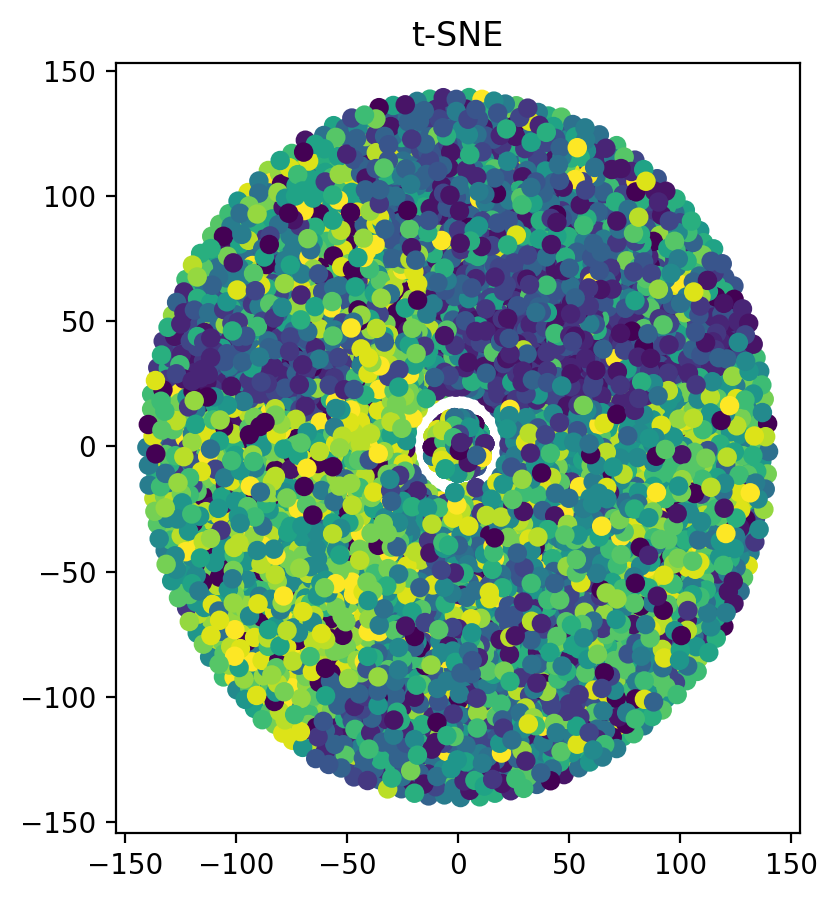

In [41]:
plt.figure(figsize=(15, 5), dpi=200)
plt.subplot(1, 3, 2)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
plt.title("t-SNE")

- PCA показывает слабую сепарацию классов, многие классы перекрываются.
- t-SNE показывает лучшее разделение классов, но все еще присутствуют перекрытия.

PCA показал наиболее значительное влияние на качество классификации, обеспечивая наилучшие показатели точности и F1-меры. 